<a href="https://colab.research.google.com/github/renecotyfanboy/Bayes-JAX-tutorial/blob/main/workshop_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Where everyone starts

In [ ]:
import math

def busy():

  return math.exp(sum([(-1)**(i%2 +1)/i for i in range(1, int(1e6))]))

In [ ]:
%%timeit
busy()

392 ms ± 6.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# The world of vectorization

In [ ]:
import numpy as np 

def busy_numpy():

  integers = np.arange(1, int(1e6))

  return np.exp(np.sum((-1)**(integers%2 +1)/integers))

In [ ]:
%%timeit

busy_numpy()

21.7 ms ± 955 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Even faster ?

In [ ]:
import jax.numpy as jnp 

def busy_jax():

  integers = jnp.arange(1, int(1e6))

  return jnp.exp(jnp.sum((-1)**(integers%2 +1)/integers))

In [ ]:
%%timeit
busy_jax().block_until_ready()

11 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
import jax

busy_jit = jax.jit(busy_jax)
busy_jit().block_until_ready()

DeviceArray(2.0000007, dtype=float32)

In [ ]:
%%timeit
busy_jit().block_until_ready()

5.25 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# What is JAX and how does it work ? 

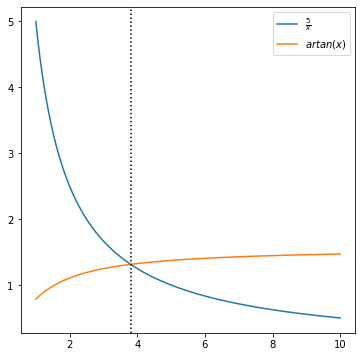

In [ ]:
import matplotlib.pyplot as plt 
from jax.config import config
config.update("jax_enable_x64", True)


def function_1(x):

  return 5/x

def function_2(x):

  return jnp.arctan(x)

x = np.linspace(1, 10, 1000)
approx_root = 3.8056450482688104

plt.figure(figsize=(6,6))
plt.plot(x, function_1(x), label=r'$\frac{5}{x}$')
plt.plot(x, function_2(x), label=r'$artan(x)$')
plt.axvline(approx_root, color='black', linestyle='dotted')
plt.legend();

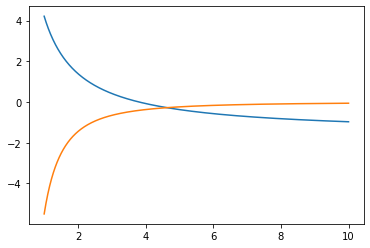

In [ ]:
f = jax.jit(lambda x: function_1(x) - function_2(x))
df = jax.grad(f)

plt.plot(x, f(x))
plt.plot(x, jax.vmap(df)(x))

In [ ]:
@jax.jit
def newton_step(x):

  return x - f(x)/df(x), x

x1 = np.inf #Dummy value
x2 = 5. #Starting point

tol = 1e-12

n_iter = 0

while jnp.abs(x1 - x2) > tol:

  x2, x1 = newton_step(x2)
  n_iter += 1

print(f'Root is approximately x = {(x1 + x2)/2} +- {tol} after {n_iter} iterations')

Root is approximately x = 3.8056450482688104 +- 1e-12 after 6 iterations


In [ ]:
d2f = jax.grad(df)

@jax.jit
def chebyshev_step(x):

  return x - f(x)/df(x) - 1/2 * (f(x)/df(x))**2*(d2f(x)/df(x)), x

x1 = np.inf #Dummy value
x2 = 5. #Starting point

tol = 1e-12

n_iter = 0

while jnp.abs(x1 - x2) > tol:

  x2, x1 = chebyshev_step(x2)
  n_iter += 1

print(f'Root is approximately x = {(x1 + x2)/2} +- {tol} after {n_iter} iterations')

Root is approximately x = 3.8056450482688504 +- 1e-12 after 4 iterations
